# Sample Analysis for Tracker Observables

Begin by importing the code, which I outsouced into `mycode.py` to keep this notebook nice and clean. 

In [1]:
from mycode_michael import *

## Load Data and Prepare Weights

To load the data, we initialize a class `Analyzer`.
- If `inputfile` is not `None`, then the muon and neutrino spectra are just read from that file. This is the fast option. 
- Otherwise, the class loads all the data from the `/NumpyArrays` directory and compute the event weights. In this case you can save the data in an `outputfile` so that one can easily load it later on. 

In [2]:
analyser = Analyzer()

Prepare Data Manually
 ... found 205652 nu_mu events in 5.79 seconds
 ... found 53357 nu_e events in 2.34 seconds
 ... found 2944995 muon events in 79.61 seconds


Now, we can look at the statistics of muons. The following table shows the weight of individual muons in units of fb. So if this number is 0.2, then our MC statistics correspond the expected event rate for 5 fb$^{-1}$, and if it is 0.0066,then our MC statistics correspond the expected event rate for 150 fb$^{-1}$. 

In [3]:
analyser.get_muon_statistics()

121.119 : 8.905
327.154 : 2.077
524.136 : 0.58
721.13 : 0.214
924.133 : 0.189
1124.14 : 0.309
1324.14 : 0.327
1524.14 : 0.239
1724.13 : 0.145
1924.14 : 0.089
2124.14 : 0.068
2324.14 : 0.088
2521.12 : 0.085
2721.12 : 0.054
2921.12 : 0.042
3121.12 : 0.026
3321.12 : 0.012
3521.12 : 0.009


## Plot Individual Events

An individual event is characterized by a dictionary of its properties:
- `primaryEnergy` which is the energy of the incoming muon
- `zposition` indicating where the neutrino interacted (number meaningless for muons)
- `scintillator` indicating which scintillators where activated
- `calorimeter` giving the energy deposit in the calorimeter
- `hist1 ... hist4`: giving the coordinates of hits in the tracker
- `weight`: giving the event weight in units of `fb`
Let's look at one muon neutrino event:

In [4]:
print (analyser.muon_neutrino_data[10])

{'primaryEnergy': 3595.365, 'zposition': 98.2, 'weight': 6.49022534931631e-05, 'scintillator': array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1]), 'calorimeter': 4.636, 'hits1': array([[  0., -11.,   1.],
       [ -7.,   1.,   2.],
       [  0.,   2.,   7.],
       [ -6.,   6.,   1.],
       [ -5.,   6.,   1.],
       [ -8.,   7.,   1.],
       [-11.,   9.,   1.],
       [ -5.,   9.,   1.],
       [ -4.,   9.,   1.],
       [ -2.,   9.,   1.],
       [ -5.,  10.,   2.],
       [ -4.,  10.,   5.],
       [ -3.,  10.,   3.],
       [ -2.,  10.,   1.],
       [ -5.,  11.,   3.],
       [ -4.,  11.,   2.],
       [ -3.,  11.,   2.],
       [ -1.,  11.,   1.],
       [  3.,  11.,   1.],
       [ -5.,  12.,   1.],
       [ -4.,  12.,   1.],
       [ -1.,  12.,   1.]]), 'hits2': array([[-5., 10.,  1.]]), 'hits3': array([[ 2., -9.,  1.],
       [-4., -3.,  1.],
       [ 6.,  7.,  2.],
       [-5.,  9.,  1.],
       [-4.,  9.,  1.],
       [-5., 10.,  9.],
       [-4., 10.,  2.],
       [-5., 11.,  1.]]), '

Since the above format is a bit hard to read, we can also plot individual events. If you want to see a particular event, you can use `Analyser.display_event(event,filename)`. Alternatively, one can also use `Analyser.display_random_event(particle, requirement)` with particle being `muon`, `nu_mu` or `nu_el`. Here `requirement` adds some additional cuts on the event, when selecting it. 

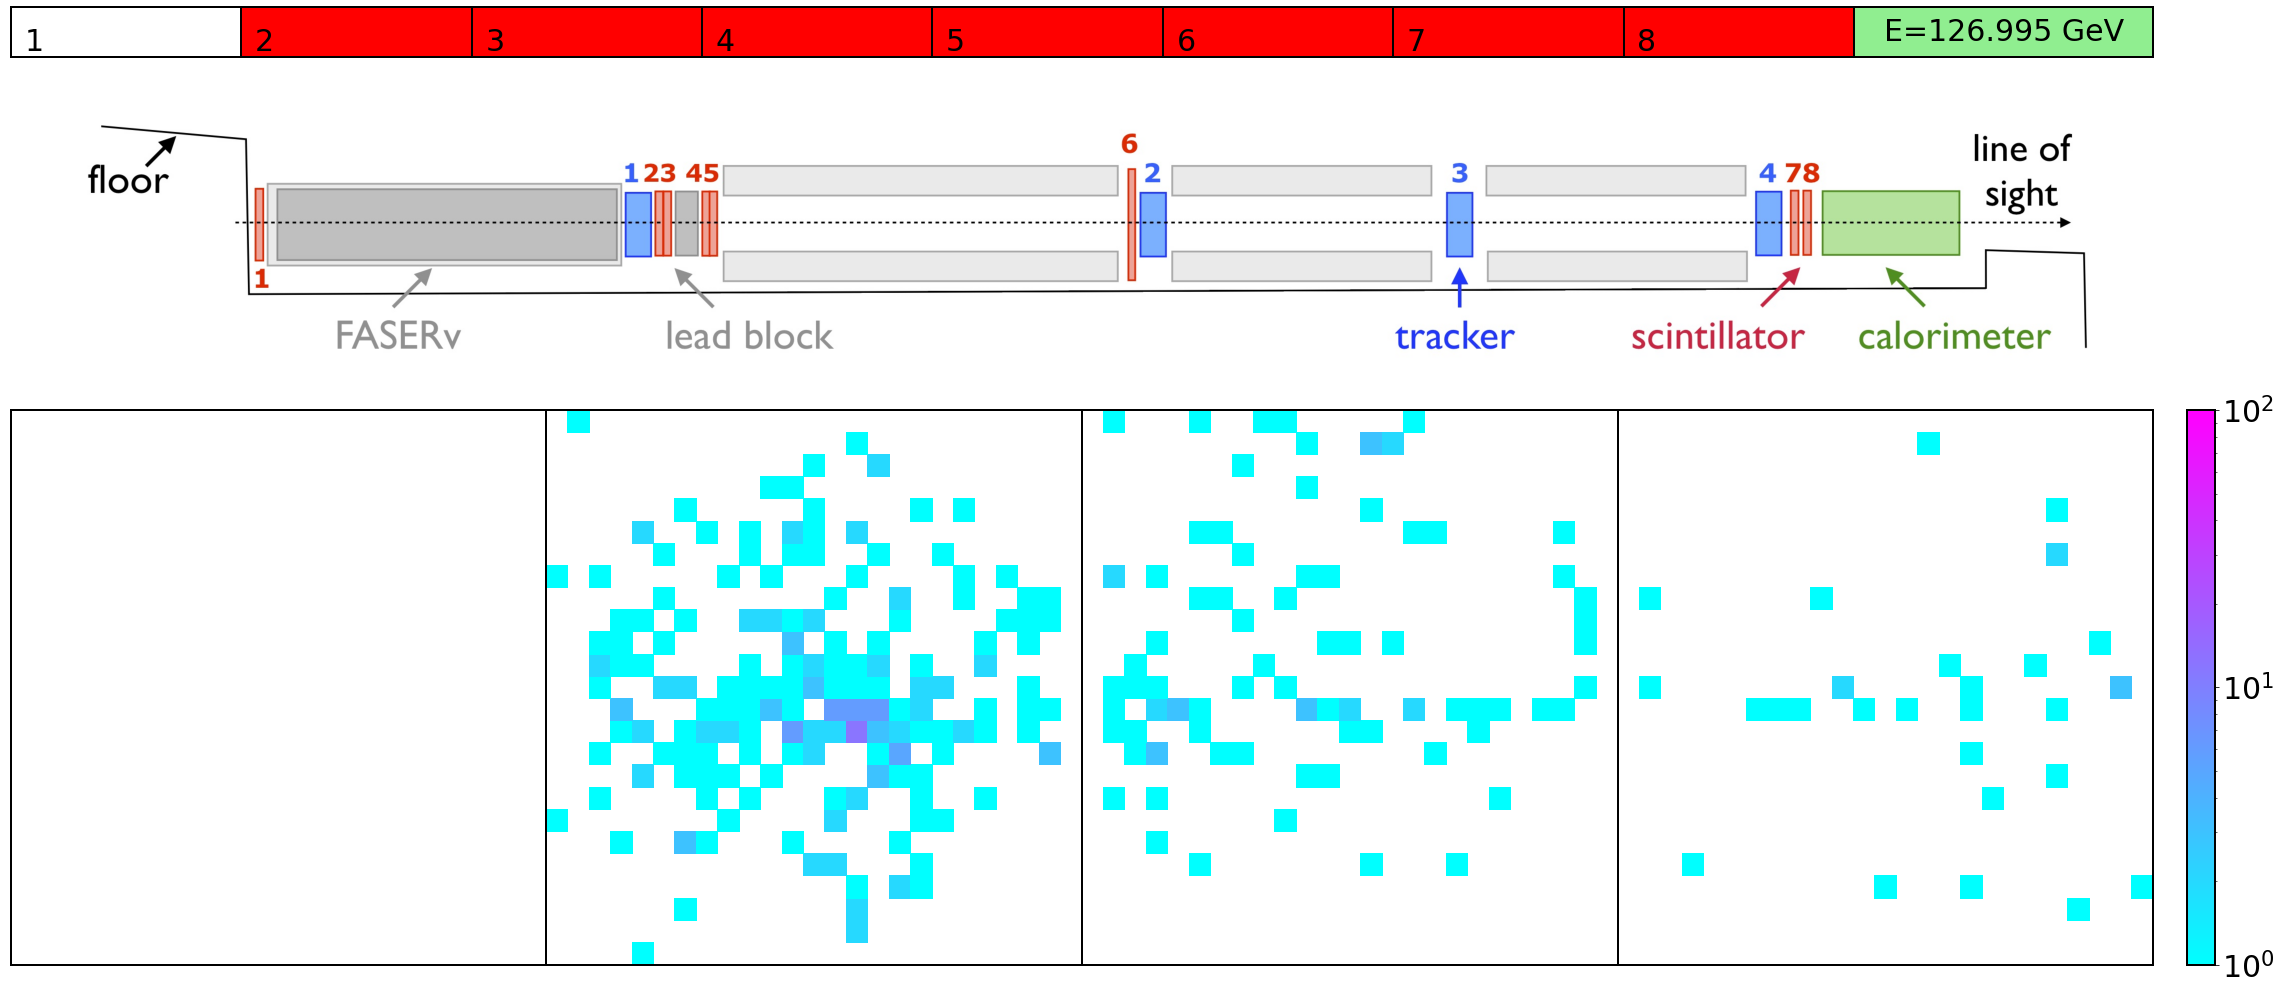

In [5]:
analyser.display_random_event(particle="nu_mu", requirement="event['calorimeter']>1")

# Plot Counts vs Calorimeter Energy

`Analyser.binCalEnergy(particle, bins, requirement, weighted)` bins the events in analyser of type `particle` according to `bins`. We can restrict the set of events by `requirement` and specify whether we want the weighted counts are the simulated counts with the `weighted` flag. By default, the method uses weighted counts with 100 bins between the smallest calorimeter deposit and largest calorimeter deposit within the range [0.01, 1000] GeV.

<!-- To save time in binning, the default `requirement` is that the scintillator signal is [0, 0, 1, 1, 1, 1, 1, 1, 1, 1] (implementing this with `eval(requirement)` requires approximately 5 times the computation time). To remove this requirement, simply run with `requirement="True"`. -->

The method returns a dictionary with the bins used (saved in `bins`) and the counts and uncertainties in each bin for each primary energy in `data` (stored in the key `primaryEnergy` where `primaryEnergy` is the `float` value of the primary energy in the event). 

The example below bins the weighted counts by the calorimeter energy of the `muon` events in our `analyser` object that match the scintillator signal [0, 0, 1, 1, 1, 1, 1, 1, 1, 1] (i.e. those muons which fail to trigger the first pair of scintillators directly before the tungsten target and trigger all other scintillators).

In [52]:
muon_bins = analyser.binCalEnergy(particle = 'muon', bins = np.logspace(-3,4,25),
                                 requirement = "(event['calorimeter'] == [0, 0, 1, 1, 1, 1, 1, 1, 1, 1]).all()")

NameError: name 'event' is not defined

Let's compare the event rate for muons, muon neutrinos, and electron neutrinos with a plot. `Analyser.sumCalEnergyBins(particle, bins, requirement, weighted, primaryEnergies)` sums over the primary energies in `primaryEnergies` in result of `Analyser.binCalEnergy(particle, bins, requirment, weighted)` and returns `(bins, counts, uncertainties)`. By default, it sums over all primary energies in the dataset for `particle`.

In [7]:
bins = np.logspace(-3,4,25)
bins, muon_counts, muon_uncert = analyser.sumCalEnergyBins(particle = 'muon', bins = bins)
bins, nu_mu_counts, nu_mu_uncert = analyser.sumCalEnergyBins(particle = 'nu_mu', bins = bins)
bins, nu_el_counts, nu_el_uncert = analyser.sumCalEnergyBins(particle = 'nu_el', bins = bins)

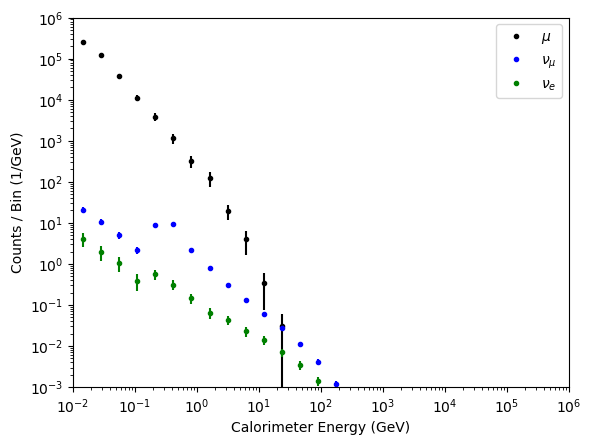

In [8]:
matplotlib.rcdefaults()
for (counts, uncert, color) in [(muon_counts, muon_uncert, 'k'),
                                      (nu_mu_counts, nu_mu_uncert, 'b'),
                                      (nu_el_counts, nu_el_uncert, 'g')]:
    counts = counts[1:]/np.diff(bins)
    uncert = uncert[1:]/np.diff(bins)
    plt.plot(bins[1:], counts, 'o' + color, markersize=3)
    plt.errorbar(bins[1:], counts, uncert, fmt=' ', color=color)
    
plt.xscale('log');
plt.yscale('log');
plt.xlim([10**-2, 10**6]);
plt.ylim([10**-3, 10**6]);
plt.xlabel('Calorimeter Energy (GeV)');
plt.ylabel('Counts / Bin (1/GeV)' );
plt.legend(['$\mu$', '$\\nu_\mu$', '$\\nu_e$']);

We can see that the distribution of events for the neutrinos differs from that of the muons. Let us investigate whether this is observable. The first concern is what is happening in the high energy bins for the muons, since we have very limited statistics in this region. The approach we take below is to fit a function to the muon distribution to predict the counts in that region.

In [9]:
from sklearn.linear_model import LinearRegression

In [31]:
def modelData(binData, minEnergy=0):
    bins = binData['bins']
    energyMask = bins > minEnergy
    primaryEnergies = [e for e in binData.keys() if isinstance(e,float)]

    models = {}
    x1 = np.reshape(np.log(bins),(np.size(bins),1))[1:][energyMask[1:]]
    X = -x1
#     x2 = np.reshape(bins,(np.size(bins),1))[energyMask]
#     X = np.append(-x1,-x2,1)
    for en in primaryEnergies:
        y = (binData[en][0][1:] / np.diff(bins))[energyMask[1:]]
        err = (binData[en][1][1:] / np.diff(bins))[energyMask[1:]]
        
        # zeros are problematic in division and logs
        mask = y > 0
        err = err[mask]/y[mask]
        y = np.reshape(np.log(y[mask]),(np.sum(mask),1))
        weights = 1/err

        # Fit the weighted linear model
        model = LinearRegression().fit(X[mask,:], y, weights)
        y_pred = model.predict(X[mask,:])
        
        # Compute covariance matrix
        r2 = np.dot((y-y_pred).transpose(),np.dot(np.diag(weights),(y-y_pred)))
        N, p = np.shape(X[mask,:])
        p = p + 1
        X_with_const = np.zeros((N,p))
        X_with_const[:,0] = 1
        X_with_const[:,1:] = X[mask,:]
        covMat = r2 / (N-p) * np.linalg.inv(np.dot(X_with_const.transpose(),np.dot(np.diag(weights),X_with_const)))
        
        models[en] = (model, covMat)
    
    return models

def predModel(model, covMat, energies):
        
    coefs = model.coef_
    intercept = model.intercept_

#     a = coefs[0][0]
#     b = coefs[0][1] * np.log(10)

    a = coefs[0]
    C = np.exp(intercept[0])

#     scaling = np.diag([1/(np.log(10) * C), 1, 1/np.log(10)])
    scaling = np.diag([ 1/C, 1])
    covMat = np.dot(scaling, np.dot(covMat, scaling))

#     y_mean = C * energies ** -a * np.exp(-b*energies)
    y_mean = C * energies ** -a
    dydC = y_mean / C
    dyda = - np.log(energies) * y_mean
#     dydb = - y_mean / energies
#     dy = np.array([dydC, dyda, dydb])
    dy = np.array([dydC, dyda])

    y_err = np.sqrt(np.einsum('ji,jk,ki->i', dy, covMat, dy))
    
    return y_mean, y_err

In [32]:
muons_fits = modelData(muon_bins, minEnergy=10**-2)

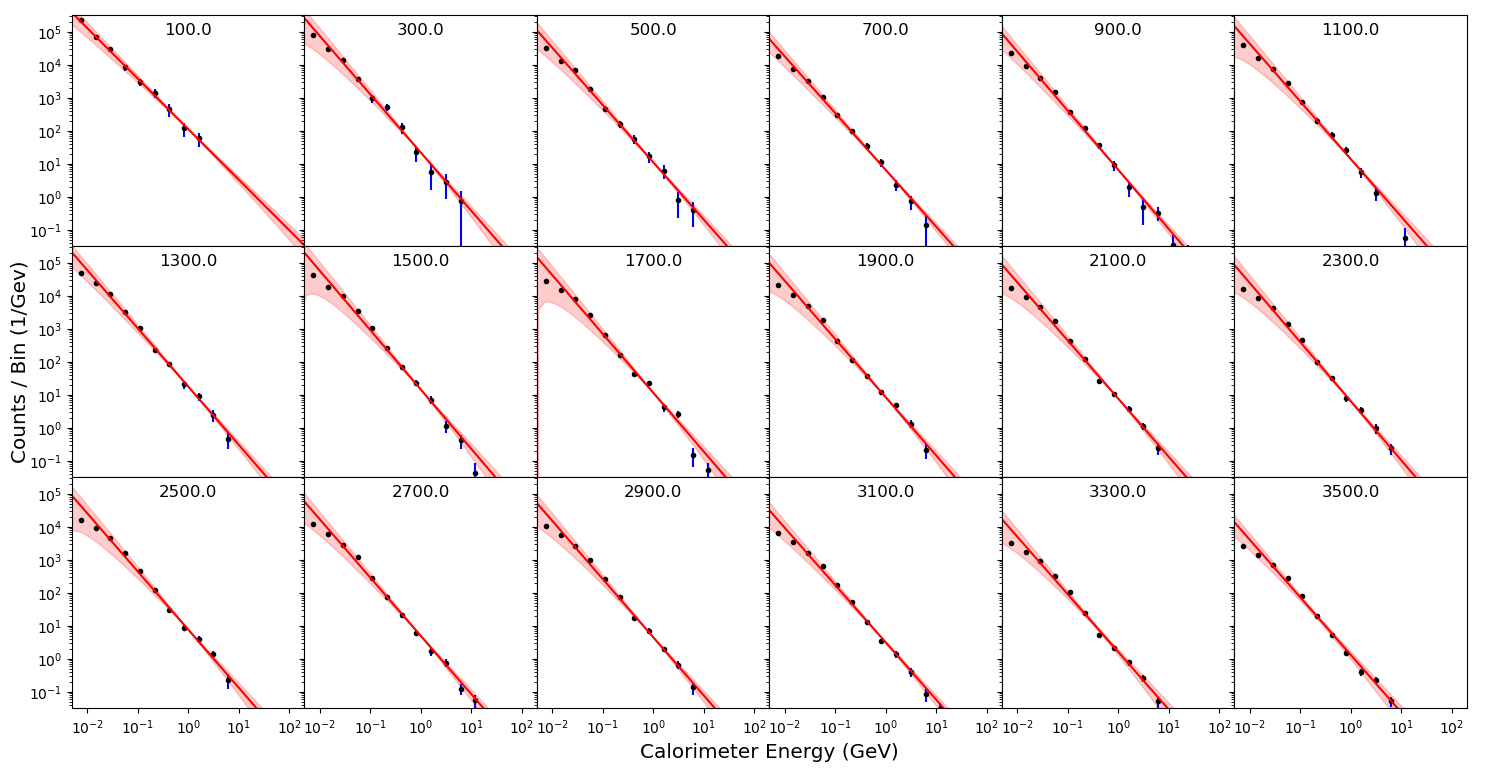

In [33]:
fig, axs = plt.subplots(3,6, sharex=True, sharey=True, figsize=(18,9), gridspec_kw={'hspace' : 0,'wspace' : 0})
axs = [axs[i,j] for i in range(3) for j in range(6)]

energies = np.logspace(-3,3)
for (primEnergy, ax) in zip(muons_fits.keys(),axs):
    plt.sca(ax)
    counts = muon_bins[primEnergy][0][1:]/np.diff(bins)
    uncert = muon_bins[primEnergy][1][1:]/np.diff(bins)
    plt.plot(bins[1:], counts, 'ok', markersize=3)
    plt.errorbar(bins[1:], counts, uncert, fmt=' ', color='b')
    
    model  = muons_fits[primEnergy][0]
    covMat = muons_fits[primEnergy][1]
    y_mean, y_err = predModel(model, covMat, energies)
    plt.plot(energies, y_mean, '-r')
    plt.fill_between(energies, y_mean-3*y_err, y_mean+3*y_err, color='r', alpha=0.2)

    plt.xscale('log')
    plt.yscale('log')
    plt.xlim([10**-2.3, 10**2.3]);
    plt.xticks([10**-2, 10**-1, 10**0, 10**1, 10**2])
    plt.ylim([10**-1.5, 10**5.5]);
    plt.text(1,10**4.9,str(np.round(primEnergy,-2)),horizontalalignment='center', fontsize="large")

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel('Calorimeter Energy (GeV)', labelpad=8, fontsize="x-large");
plt.ylabel('Counts / Bin (1/Gev)', labelpad=8, fontsize="x-large");

In [34]:
from scipy.integrate import quad

In [38]:
def integrateFits(fits, E_min = 1):
    count = 0
    uncer = 0
    
    for (model, covMat) in fits.values():
        a = model.coef_[0]
        C = np.exp(model.intercept_[0])
        
        scaling = np.diag([1/C, 1])
        covMat = np.dot(scaling, np.dot(covMat, scaling))

        I = C / (a-1) * E_min ** (1-a)
        dIda = - ( 1/(a-1) + np.log(E_min) ) * I
        dIdC = I / C
        
        dI = np.array([dIdC, dIda])
        
        cov_I2 = np.dot(dI.transpose(), np.dot(covMat, dI))[0]
        
        count += I
        uncer += np.sqrt(cov_I2)
    return count[0], uncer[0]

In [39]:
integrateFits(muons_fits, E_min = 10)

(94.77162093636471, 15.314641838717591)

In [140]:
def integrateCounts(data, calEnergies, requirement="True", weighted = True):

    func = eval('lambda event : ' + requirement)
    # Apply an early cut with the scintillator cut so we don't search the same events repeatedly
    subdata = [(event['calorimeter'], event['weight']) for event in data
               if func(event) and
                  event['calorimeter'] > min(calEnergies)]

    raw_counts = [len(subdata)]
    weighted_counts = [np.sum([w for (e, w) in subdata])]

    # Sort and pop off minimum energy since cut was already made
    calEnergies = sorted(calEnergies)
    calEnergies = calEnergies[1:]

    for energy in calEnergies:
        subdata = [(e,w) for (e,w) in subdata if e > energy]
        raw_counts.append(len(subdata))
        weighted_counts.append(np.sum([w for (e, w) in subdata]))

    raw_counts = np.array(raw_counts)
    weighted_counts = np.array(weighted_counts)
    if weighted:
        mask = raw_counts > 0
        counts = weighted_counts
        uncertainties = np.zeros(np.shape(counts))
        uncertainties[mask] = counts[mask] / np.sqrt(raw_counts[mask])
        return weighted_counts, uncertainties
    else:
        return raw_counts, np.sqrt(raw_counts)

def modelData(cuts):
    calEnergies = cuts[0]
    counts = cuts[1]
    errors = cuts[2]
    
    mask = counts > 0
    y = np.log(counts[mask])
    y_err = errors[mask] / counts[mask]
    weights = 1 / y_err
    
    X = np.append(-np.log(calEnergies[mask, np.newaxis]),
                  -calEnergies[mask, np.newaxis],
                  1)
    
    # Fit the weighted linear model
#     model = LinearRegression().fit(X, y, weights)
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    
    # Compute covariance matrix
#     r2 = np.dot((y-y_pred).transpose(),np.dot(np.diag(weights),(y-y_pred)))
    r2 = np.dot((y-y_pred).transpose(),(y-y_pred))
    N, p = np.shape(X)
    p = p + 1
    X_with_const = np.zeros((N,p))
    X_with_const[:,0] = 1
    X_with_const[:,1:] = X
#     covMat = r2 / (N-p) * np.linalg.inv(np.dot(X_with_const.transpose(),np.dot(np.diag(weights),X_with_const)))
    covMat = r2 / (N-p) * np.linalg.inv(np.dot(X_with_const.transpose(),X_with_const))

    return (model, covMat)

def predModel(modelobj, energies):
        
    model = modelobj[0]
    covMat = modelobj[1]
    
    coefs = model.coef_
    intercept = model.intercept_

    b0 = intercept
    b1 = coefs[0]
    b2 = coefs[1]

    x = energies
    y_mean = np.exp(b0) * x ** -b1 * np.exp(-b2*x)
    dy0 = y_mean
    dy1 = - np.log(x) * y_mean
    dy2 = - y_mean / x
    dy = np.array([dy0, dy1, dy2])
    
    y_err = np.sqrt(np.einsum('ji,jk,ki->i', dy, covMat, dy))
    
    return y_mean, y_err

In [141]:
%%time
calEnergies = np.logspace(-2, np.log10(15), 10)
muon_counts, muon_uncert = integrateCounts(analyser.muon_data, calEnergies=calEnergies,
                requirement="(event['scintillator'] == [0, 0, 1, 1, 1, 1, 1, 1, 1, 1]).all()")

CPU times: user 11.5 s, sys: 0 ns, total: 11.5 s
Wall time: 11.5 s


In [142]:
modelObj = modelData((calEnergies, muon_counts, muon_uncert))

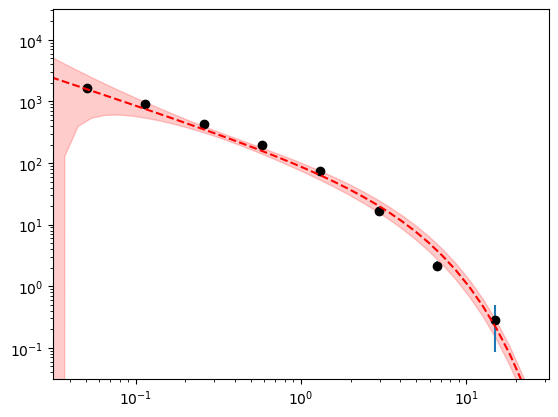

In [146]:
plt.plot(calEnergies, muon_counts, 'ko')
plt.errorbar(calEnergies, muon_counts, muon_uncert, fmt=' ')

x_pred = np.logspace(-2,2)
y_pred, y_err = predModel(modelObj, x_pred)
plt.plot(x_pred, y_pred, '--r')
plt.fill_between(x_pred, y_pred - y_err, y_pred + y_err, color='r', alpha=0.2)

plt.xscale('log')
plt.yscale('log')
plt.xlim([10**-1.5,10**1.5]);
plt.ylim([10**-1.5,10**4.5]);